<a href="https://colab.research.google.com/github/tiagopessoalima/ED1/blob/main/Semana_03_(ED1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **[Insertion Sort](https://www.youtube.com/watch?v=EdIKIf9mHk0)**

Compartilha certas semelhanças conceituais com o *Bubble Sort*. No entanto, ao invés de comparar e trocar elementos adjacentes, aborda o problema de ordenação de uma maneira diferente. Ele constrói uma parte ordenada da lista à medida que percorre a lista original, **inserindo** cada elemento na posição apropriada dentro dessa porção ordenada. A figura abaixo mostra o processo de ordenação por inserção. Itens sombreados representam as sublistas ordenadas conforme cada passagem feita pelo algoritmo.


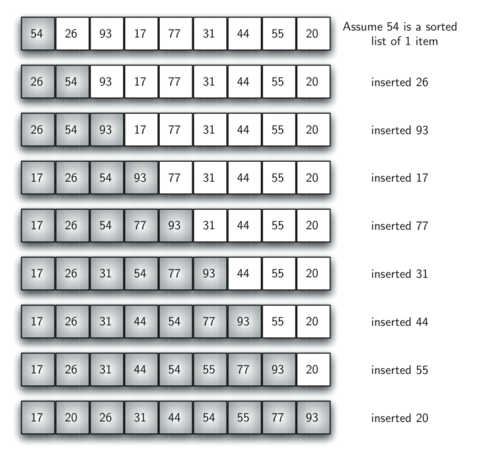

### **O que acontece em cada passagem?**

Iniciamos considerando que uma lista com um único elemento (na posição 0) já está considerada como ordenada. A cada passagem, que ocorre do elemento $1$ até $𝑛−1$, o elemento atual é comparado com aqueles que já fazem parte da sublista ordenada. Ao progredirmos retroativamente pela sublista ordenada, deslocamos os elementos maiores para a direita. Quando nos deparamos com um elemento menor ou alcançamos o final da sublista, o elemento atual é inserido no local apropriado. Esse processo contínuo de comparação, deslocamento e inserção é a essência do algoritmo. A figura a seguir oferece uma análise detalhada da quinta passagem.

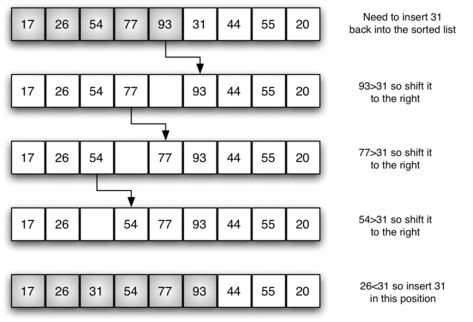

Nesta etapa do algoritmo, uma sublista ordenada composta por cinco elementos $[17, 26, 54, 77, 93]$ está em foco, com a intenção de inserir o valor $31$ nesse conjunto. A primeira comparação resulta no deslocamento do item $93$ para a direita. Consequentemente, os elementos $77$ e $54$ também são deslocados para posições anteriores. Assim que o elemento $26$ é encontrado, o processo de deslocamento cessa, permitindo que o número $31$ seja inserido na lacuna que se formou.

###**Descrição Formal**

Dado um vetor $A[0 \dots n-1]$:

1. **Inicialização:**
   Considere o subvetor $A[0 \dots i-1]$ como **ordenado** para cada $i$ no intervalo $1 \dots n-1$.

2. **Iteração:**
   Para cada $i$ de $1$ até $n-1$:

   * Defina **key** $\leftarrow A[i]$
   * Defina $j \leftarrow i - 1$
   * Enquanto $j \ge 0$ **e** $A[j] > \text{key}$:

     * $A[j+1] \leftarrow A[j]$
     * $j \leftarrow j - 1$
   * $A[j+1] \leftarrow \text{key}$



### **Pseudocódigo**

```text
InsertionSort(A, n):
    para i ← 1 até n-1:
        key ← A[i]
        j ← i - 1

        enquanto j ≥ 0 e A[j] > key:
            A[j+1] ← A[j]
            j ← j - 1

        A[j+1] ← key
```

### **Implementação**

Serão implementadas duas variações: **iterativa**, que insere cada elemento na posição correta da parte já ordenada, e **recursiva**, que aplica a mesma lógica a subconjuntos menores do vetor.

#### **Implementação Iterativa**

A abordagem iterativa fundamenta-se no processo de percorrer sequencialmente a sequência de entrada, expandindo progressivamente a porção ordenada do vetor. Em cada iteração, o elemento corrente é inserido na posição correta dentro dessa subsequência ordenada por meio de comparações e deslocamentos sucessivos. Esse procedimento é repetido até que todos os elementos tenham sido processados, resultando em uma sequência completamente ordenada ao término do laço principal.

In [ ]:
def insertion_sort(lista):
    """
    Ordena a lista utilizando o algoritmo Insertion Sort (versão iterativa).
    Algoritmo estável, in-place, com complexidade O(n²) no pior caso.
    """
    # Percorre a lista a partir do segundo elemento
    for i in range(1, len(lista)):
        valor_atual = lista[i]  # Elemento a ser inserido na posição correta
        j = i - 1  # Índice do elemento anterior

        # Desloca elementos maiores para a direita
        while j >= 0 and lista[j] > valor_atual:
            lista[j + 1] = lista[j]
            j -= 1

        # Insere o valor atual na posição correta
        lista[j + 1] = valor_atual

#### **Implementação Recursiva**

A abordagem recursiva baseia-se no princípio de que a inserção de um elemento em uma subsequência ordenada é uma operação repetitiva que, quando aplicada sucessivamente, converte gradualmente a sequência não ordenada em uma sequência ordenada. A recursão materializa essa lógica por meio de chamadas aninhadas, em que cada invocação resolve um subproblema de tamanho $n-1$, reduzindo iterativamente o segmento não ordenado. O processo prossegue até a condição de parada — uma subsequência de tamanho unitário, intrinsicamente ordenada — momento em que todos os elementos encontram-se posicionados corretamente.

In [ ]:
def insertion_sort_recursivo(lista, n=None):
    """
    Ordena a lista utilizando o algoritmo Insertion Sort (versão recursiva).
    Algoritmo estável, in-place, com complexidade O(n²) no pior caso.
    """
    if n is None:
        n = len(lista)

    # Caso base: lista com 0 ou 1 elemento já está ordenada
    if n <= 1:
        return

    # Ordena recursivamente os primeiros n-1 elementos
    insertion_sort_recursivo(lista, n - 1)

    # Insere o último elemento na posição correta
    ultimo_elemento = lista[n - 1]
    j = n - 2

    # Desloca elementos maiores para a direita
    while j >= 0 and ultimo_elemento < lista[j]:
        lista[j + 1] = lista[j]
        j -= 1

    lista[j + 1] = ultimo_elemento

### **Exemplo de Uso**

In [ ]:
numeros = [64, 34, 25, 12, 22, 90, 11]
print("Lista original:", numeros)
insertion_sort(numeros)
print("Lista ordenada:", numeros)

Lista original: [64, 34, 25, 12, 22, 90, 11]
Lista ordenada: [11, 12, 22, 25, 34, 64, 90]


### **Análise do Tempo**

Abaixo está o gráfico comparativo do tempo gasto pelas duas diferentes implementações do *Insertion Sort*.

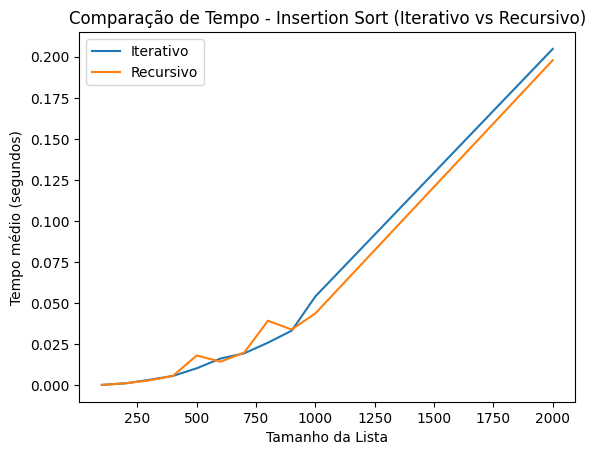

In [ ]:
import time
import matplotlib.pyplot as plt

# Tamanhos das listas para análise
tamanhos_listas = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 2000]

tempos_iterativo = []
tempos_recursivo = []
num_execucoes = 100  # Número de execuções para média

for tamanho in tamanhos_listas:
    lista_base = list(range(tamanho, 0, -1))  # Lista decrescente

    # Tempo médio versão iterativa
    soma_tempos_iterativo = 0
    for _ in range(num_execucoes):
        dados = lista_base.copy()
        inicio = time.time()
        insertion_sort(dados)
        fim = time.time()
        soma_tempos_iterativo += (fim - inicio)
    tempos_iterativo.append(soma_tempos_iterativo / num_execucoes)

    # Tempo médio versão recursiva
    soma_tempos_recursivo = 0
    for _ in range(num_execucoes):
        dados = lista_base.copy()
        inicio = time.time()
        insertion_sort_recursivo(dados)
        fim = time.time()
        soma_tempos_recursivo += (fim - inicio)
    tempos_recursivo.append(soma_tempos_recursivo / num_execucoes)

# Plotagem dos resultados
plt.plot(tamanhos_listas, tempos_iterativo, label='Iterativo')
plt.plot(tamanhos_listas, tempos_recursivo, label='Recursivo')
plt.xlabel('Tamanho da Lista')
plt.ylabel('Tempo médio (segundos)')
plt.title('Comparação de Tempo - Insertion Sort (Iterativo vs Recursivo)')
plt.legend()
plt.show()

### **Complexidade**

No pior caso — quando a sequência está em **ordem inversa** — cada elemento precisa ser comparado com **todos** os elementos da porção já ordenada antes de ser inserido. Isso resulta na seguinte contagem de comparações:

* O **2º elemento** é comparado com **1** elemento;
* O **3º elemento** é comparado com **2** elementos;
* O **4º elemento** é comparado com **3** elementos;
* …
* O **n‑ésimo elemento** é comparado com **n‑1** elementos.

Portanto, o número total de comparações é:

$$
1 + 2 + 3 + \dots + (n-1)
$$

Essa soma corresponde à **soma dos primeiros $n-1$ números inteiros positivos**, que é dada pela fórmula:

$$
\frac{n(n-1)}{2}
$$

No pior caso, isso implica uma complexidade assintótica de:

$$
O(n^2)
$$

Por outro lado, no **melhor caso**, quando a lista já está ordenada, o algoritmo realiza apenas uma comparação por elemento, confirmando que o elemento já está na posição correta. Assim, a complexidade no melhor cenário é linear, $O(n)$.

> **ATENÇÃO**: Importante destacar a distinção entre as operações de **deslocamento** (movimentação de elementos para a direita) e **troca** (*swap* entre dois elementos). Enquanto a troca envolve múltiplas atribuições e geralmente custos computacionais maiores, o deslocamento consiste na simples atribuição de um valor para uma posição adjacente, o que representa aproximadamente um terço do custo de uma troca, conforme estudos de análise de algoritmos e medições práticas.

In [ ]:
import time

# --- Funções auxiliares ---
def swap(a, i, j):
    """Troca os elementos nas posições i e j"""
    tmp = a[i]
    a[i] = a[j]
    a[j] = tmp

def shift(a, i):
    """Desloca o elemento da posição i para a direita"""
    a[i+1] = a[i]

# --- Teste prático ---
n = 1_000_000
arr_swap = list(range(n))
arr_shift = list(range(n))

# Medindo swaps
start = time.time()
for i in range(n-1):
    swap(arr_swap, i, i+1)
end = time.time()
print("Tempo total com SWAP:", round(end - start, 3), "s")

# Medindo shifts
start = time.time()
for i in range(n-1):
    shift(arr_shift, i)
end = time.time()
print("Tempo total com SHIFT:", round(end - start, 3), "s")


Tempo total com SWAP: 0.201 s
Tempo total com SHIFT: 0.161 s


### **Vantagens e Limitações**

#### **Vantagens**

- **Simplicidade de Implementação:**
  O algoritmo Insertion Sort apresenta uma lógica conceitualmente simples, caracterizada por uma estrutura sequencial de comparação e deslocamento, sem necessidade de estruturas de controle complexas como árvores, pilhas ou filas. Essa simplicidade facilita tanto a compreensão quanto a implementação direta em diversas linguagens de programação.

- **Eficiência em Pequenos Conjuntos de Dados e Dados Quase Ordenados:**
  Demonstra desempenho aprimorado em listas de tamanho reduzido ou em sequências que apresentam alta ordem parcial. Nesses cenários, a complexidade tende a se aproximar de $O(n)$, pois o número de deslocamentos e comparações necessárias é minimizado.

- **Baixa Sobrecarga de Memória:**
  Sendo um algoritmo **in-place**, o Insertion Sort utiliza espaço auxiliar constante, $O(1)$, para realizar suas operações, o que o torna especialmente indicado para ambientes com limitações de memória ou sistemas embarcados.

- **Adequação a Processamento Online e Fluxos de Dados Dinâmicos:**
  Devido à manutenção contínua de uma subsequência ordenada durante o processo, permite a inserção incremental de novos elementos mantendo a ordenação parcial, característica que o torna apropriado para ordenação de dados em tempo real ou em sistemas onde os dados são recebidos de forma sequencial e dinâmica.

#### **Desvantagens**

- **Baixa Eficiência em Listas de Grande Porte:**
  A principal limitação do Insertion Sort reside em sua complexidade temporal no pior caso, que é $O(n^2)$. Esse comportamento se manifesta quando a lista está ordenada de forma inversa, ocasionando um crescimento quadrático no número de comparações e movimentações, o que torna o algoritmo impraticável para grandes volumes de dados.

- **Desempenho Inferior em Relação a Algoritmos Otimizados:**
  Comparado a algoritmos de ordenação mais avançados, como Merge Sort, Quick Sort e Heap Sort, o Insertion Sort apresenta desempenho inferior na maioria dos casos, especialmente em listas grandes e altamente desordenadas. Esses algoritmos possuem complexidade média ou pior caso mais eficiente, geralmente $O(n \log n)$.

- **Sensibilidade à Ordenação Inicial dos Dados:**
  O desempenho é fortemente influenciado pela configuração inicial dos elementos no vetor. Entradas parcialmente ordenadas resultam em menor número de comparações e deslocamentos, enquanto listas completamente desordenadas podem levar ao máximo esforço computacional.

###**Exercícios**

1. Implemente o algoritmo de ordenação *Insertion Sort* de forma que ele comece a ordenar a lista a partir do último elemento e prossiga em direção ao primeiro. O algoritmo deve garantir que os elementos à direita do elemento-chave sejam deslocados para a esquerda, a fim de encontrar a posição correta para inserir o elemento-chave. O objetivo é obter uma lista ordenada em ordem crescente.

In [ ]:
def insertion_sort_reverse(lista):

    n = len(lista)

    # Percorre a lista do penúltimo até o primeiro elemento
    for i in range(n - 2, -1, -1):
        valor_atual = lista[i]  # Elemento a ser inserido na posição correta
        j = i + 1  # Índice do próximo elemento (à direita)

        # Desloca elementos menores para a esquerda
        while j < n and lista[j] < valor_atual:
            lista[j - 1] = lista[j]
            j += 1

        # Insere o valor atual na posição correta
        lista[j - 1] = valor_atual

2. Comparare os tempos de execução dos algoritmos de ordenação Bubble Sort e Insertion Sort à medida que o tamanho das listas aumenta. Gere listas variando de 100 a 900 elementos, meça o tempo para ordenar cada lista com cada algoritmo e registre esses tempos. Depois, plote um gráfico comparativo.

3. Implemente uma versão do algoritmo Insertion Sort que utilize a busca binária para encontrar a posição correta de inserção de cada elemento. Para isso, escreva uma função busca_binaria(lista, valor, inicio, fim) que, dado um intervalo já ordenado da lista, retorne o índice onde o elemento deve ser inserido. Em seguida, adapte o Insertion Sort tradicional para, em vez de percorrer a lista de forma linear para localizar a posição, utilizar a busca binária, deslocando os elementos necessários à direita e inserindo o valor na posição encontrada. Ao final, teste sua implementação com diferentes listas e compare o funcionamento com a versão original do algoritmo.

4. Compare os tempos de execução do Insertion Sort tradicional e do Insertion Sort com busca binária à medida que o tamanho das listas aumenta. Para isso, gere listas de números aleatórios variando de 100 a 900 elementos, meça o tempo de execução de cada algoritmo e registre os resultados. Em seguida, plote um gráfico que permita analisar o desempenho relativo das duas versões.